In [50]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import h5py
import datetime
import scipy.signal as sig
import peakutils
import Alexsdatafuncs
datman = Alexsdatafuncs.data_manipulators()
alexplot = Alexsdatafuncs.plotting_funcs()
from lmfit.models import GaussianModel

In [51]:
reload(Alexsdatafuncs)
datman = Alexsdatafuncs.data_manipulators()
alexplot = Alexsdatafuncs.plotting_funcs()

In [52]:
#Colour schemes to use
colours = cm.viridis(np.linspace(0,1,100)) 
colours_2 = cm.hot(np.linspace(0,1,100))

In [53]:
os.chdir('C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\Boron Nitride spacer\\Exfoliated hBN on Au')

In [54]:
def step_func(z, x, flatten=True):    
    
    if z[0] < z[-1]:
        print "Reversing step..."
        z = np.flip(z)
    else:
        pass
    
    z_flat=[]
    
    if flatten==True:
        # average of dz/dx at bottom of step and dz/dx at top of step to calculate linear flatten line
        lingrad = (((z[-1] - np.min(z))/(x[-1] - x[np.where(z==np.min(z))[0][0]])) + 
        ((np.max(z) - z[0])/(x[np.where(z==np.max(z))[0][0]] - x[0])))/2
        flat_func = lingrad*x - np.max(lingrad*x)/2

        z_flat = z-flat_func
    else:
        z_flat = z
    
    # Remove offset
    z_flat = z_flat - np.min(z_flat)
    # Algorithm to calculate height of a step 
    step_guess = 100
    i=1
    step_height_fin = 0
    error = 0
    for i in range(0, len(z)):
        step_height = np.average(z_flat[:i]) - np.average(z_flat[i:])
        step_height_i = np.average(z_flat[:i+1]) - np.average(z_flat[i+1:])
        step_height_diff = step_height_i - step_height
        if step_height_diff < 0  and i > 2:
            step_height_fin = step_height
            error_1 = -1*step_height_diff
            step_height = np.average(z_flat[:i+1]) - np.average(z_flat[i+1:])
            step_height_i = np.average(z_flat[:i+2]) - np.average(z_flat[i+2:])
            error_2 = step_height - step_height_i
            error = max([error_1,error_2])
            break
        else:
            pass
        
    return z_flat, step_height_fin, error


In [55]:
AFM_Au2thin = pd.read_csv('150218 BF experimental data\\Flake2\\Step_Au_to_thin_hBN.txt', sep='\t')
AFM_Au2thin.columns = AFM_Au2thin.columns.str.strip().str.lower().str.replace('\xb5', 'u')
x_thin = np.array(AFM_Au2thin['um'])
z_thin = np.array(AFM_Au2thin['nm'])

AFM_Au2thick = pd.read_csv('150218 BF experimental data\\Flake2\\Step_Au_to_thick_hBN.txt', sep='\t')
AFM_Au2thick.columns = AFM_Au2thick.columns.str.strip().str.lower().str.replace('\xb5', 'u')
x_thick = np.array(AFM_Au2thick['um'])
z_thick = np.array(AFM_Au2thick['nm'])

z_thin, step_height_thin, error_thin = step_func(z=z_thin, x=x_thin)
z_thick, step_height_thick, error_thick = step_func(z=z_thick, x=x_thick, flatten=False)

Reversing step...


C:\ProgramData\Anaconda2\lib\site-packages\numpy\lib\function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda2\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


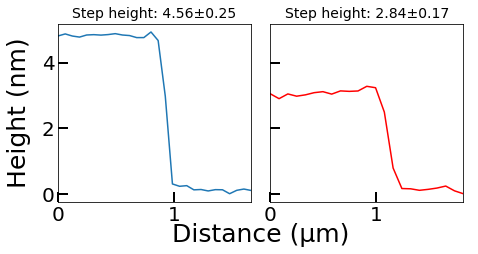

In [56]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(7,4))

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel(u"Distance (\u03bcm)", fontsize=25)
plt.ylabel("Height (nm)", fontsize=25)
ax[1].plot(x_thin, z_thin, color='red')
ax[0].plot(x_thick, z_thick)
ax[1].tick_params(labelsize=20, direction='in', width=2, length=10)
ax[0].tick_params(labelsize=20, direction='in', width=2, length=10)
ax[0].set_xlim(0,np.max(x_thick))
ax[1].set_xlim(0,np.max(x_thin))
title_thick = "Step height: " + str(np.round(step_height_thick,2)) + u"\u00B1" + str(np.round(error_thick,2))
ax[0].set_title(title_thick, fontsize=14)
title_thin = "Step height: " + str(np.round(step_height_thin,2)) + u"\u00B1" + str(np.round(error_thin,2))
ax[1].set_title(title_thin, fontsize=14)
plt.tight_layout()
fig.savefig('C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\Boron Nitride spacer\\Exfoliated hBN on Au\\150218 BF experimental data\\Flake2\\Thick_thin_comparison.jpg')

In [57]:
#Colour schemes to use
colours = cm.viridis(np.linspace(0,1,100)) 
colours_2 = cm.hot(np.linspace(0,1,100))

In [58]:
if 'hf' in globals():
    hf.close
    print "File closed"
elif 'data_f' in globals():
    data_f.close
else:
    print "No hdf5 file open"
    pass

File closed


In [59]:
# create or open an HDF5 file and open in read mode
if 'filoc' not in globals():
    hf = h5py.File('C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\Boron Nitride spacer\\Exfoliated hBN on Au\\2018-03-15 150218 exf_hBN 80nm NPs\\2018-03-15_80nm_NPs_sample213.h5', 'r')
else:
    hf = h5py.File(filoc, 'r')
# open dark field data as an list hdf5 object
dfdata = hf.get('OceanOpticsSpectrometer')
# open image data as a list hdf5 object
imdata = hf.get('LumeneraCamera')

In [60]:
start_wl = 450
end_wl = 875
dfdata.get(dfdata.keys()[0])
wls = np.array(dfdata.get(dfdata.keys()[0]).attrs['wavelengths'])
start_ind = np.where(wls.astype(int) == start_wl)
start_ind = start_ind[0][0]
end_ind = np.where(wls.astype(int) == end_wl)
end_ind = end_ind[0][0]
wls_cr = wls[start_ind:end_ind]

name = 'Flake2_80nmNPs_DF_NP15_0'
spec_name = np.array(dfdata.keys())
spec_ind = np.where(spec_name==name)[0][0]
spec = dfdata.get(dfdata.keys()[spec_ind])
bgd = np.array(spec.attrs['background'])
ref = spec.attrs['reference']
dfield = (spec.value - bgd) / (ref - bgd)

im_name = np.array(imdata.keys())
im_ind = np.where(im_name==name)[0][0]
image = imdata.get(imdata.keys()[im_ind])
df_filt = sig.savgol_filter(dfield[start_ind:end_ind], 23, 1)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in divide


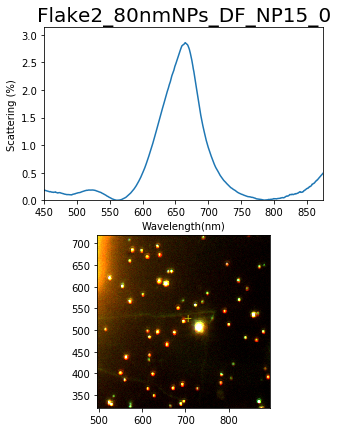

In [61]:
base = peakutils.baseline(df_filt, 1)
df_filt = df_filt-base

im_name = np.array(imdata.keys())
im_ind = np.where(im_name==name)[0][0]
image = imdata.get(imdata.keys()[im_ind])

fig, ax = plt.subplots(2, 1, figsize = (5,7))
ax[0].plot(wls_cr, (df_filt-np.min(df_filt))*100)
ax[1].imshow(image)
ax[0].set_title(name, fontsize = 20)
ax[1].text(np.shape(image)[1]/2, np.shape(image)[0]/2, '+', color='y')     
ax[0].set_ylabel("Scattering (%)")
ax[0].set_xlabel("Wavelength(nm)") 
ax[0].set_ylim(0, np.max(df_filt[200:500])*100*1.1)
ax[0].set_xlim(np.min(wls_cr), np.max(wls_cr) )

zoom = 200
plt.xlim(np.shape(image)[1]/2 - zoom, np.shape(image)[1]/2 + zoom)
plt.ylim(np.shape(image)[0]/2 - zoom, np.shape(image)[0]/2 + zoom)


fig.savefig('C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\Boron Nitride spacer\\Exfoliated hBN on Au\\2018-03-15 150218 exf_hBN 80nm NPs\\'+ name + '.jpg')

In [62]:
# Append df into matrices the data with it properly referenced
# initialise matrix for dark field, timestamp and combined

dfmat = []
dfmatwts = []
i = 0
for i in range(0, len(dfdata)):
    temp = dfdata.get(dfdata.keys()[i])
    temparr = np.array(temp)
    dfield = (temparr - bgd) / (temp.attrs['reference'] - bgd)
    dfmat.append(dfield)
    ts = datetime.datetime.strptime(temp.attrs['creation_timestamp'][:19],
                                    "%Y-%m-%dT%H:%M:%S")
    dfwts = np.append(dfield, ts)  # append the timestamp to the end of the dataset
    dfmatwts.append(dfwts)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in divide
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in divide
  # Remove the CWD from sys.path while we load stuff.


In [63]:
# If the data isn't already sorted by timestamp then this will sort it in this way
# sort by the end timestamp value and then delete the timestamp column

dfmatwts.sort(key=lambda row: row[-1:])

In [64]:
# Paste the threshold time from the gui into variable tsthreshold and this will split into two seperate datasets

tsthreshold_1 = datetime.datetime.strptime("2018-03-15T15:58:54.727000", "%Y-%m-%dT%H:%M:%S.%f")
tsthreshold_2 = datetime.datetime.strptime("2018-03-15T16:26:14.311000", "%Y-%m-%dT%H:%M:%S.%f")
df_flake2 = []
i=0
for i in range(0, len(dfmatwts)):
    if tsthreshold_1 < dfmatwts[i][-1] < tsthreshold_2:
        df_temp = dfmatwts[i][:-1]
        df_filt = sig.savgol_filter(df_temp[start_ind:end_ind], 23, 1)
        base = peakutils.baseline(df_filt, 1)
        df_filt = df_filt-base
        df_flake2.append(df_filt)
    else:
        pass


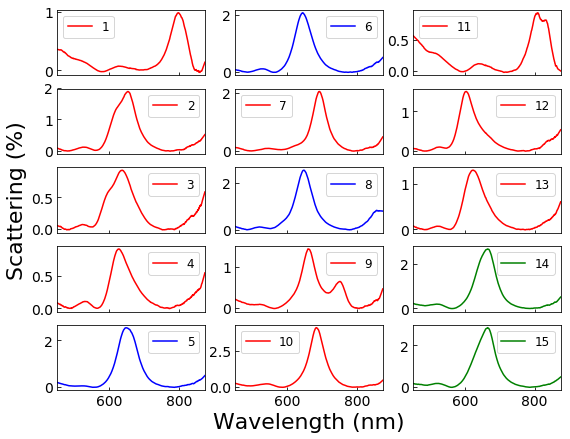

In [65]:
# Plotting grid figure from exfoliated flake with point on grid for each NP

fig, ax = plt.subplots(5,3, sharex=True, figsize=(7,7))
plt.xlim([start_wl,end_wl])
plt.subplots_adjust(left=6, right=7)

thinarr = []
thickarr = []
axlimy = len(ax[:,0])
i = 0
j = 0
spec_num = 0
for i in range(0, axlimy):
        
    row1no = 1 + i
    row2no = row1no + axlimy
    row3no = row2no + axlimy
    
    if row1no in [5,6,8]:
        ax[i][j].plot(wls_cr, df_flake2[i]*100, label=row1no, color='blue')
        thickarr.append(df_flake2[i]*100)
    else:
        ax[i][j].plot(wls_cr, df_flake2[i]*100, label=row1no, color='red')
        thinarr.append(df_flake2[i]*100)
    ax[i][j].legend(fontsize=12)
    ax[i, j].tick_params(axis='both', labelsize=14, direction='in')
    
    if row2no in [5,6,8]:
        ax[i][j+1].plot(wls_cr, df_flake2[i+axlimy]*100, label = row2no, color='blue')
        thickarr.append(df_flake2[i+axlimy]*100)
    else: 
        ax[i][j+1].plot(wls_cr, df_flake2[i+axlimy]*100, label = row2no, color='red')
        thinarr.append(df_flake2[i+axlimy]*100)
    ax[i][j+1].legend(fontsize=12)
    ax[i, j+1].tick_params(axis='both', labelsize=14, direction='in')
    
    if row3no in [5,6,8]:
        ax[i][j+2].plot(wls_cr, df_flake2[i+axlimy*2]*100, label=row3no, color='blue')
        thickarr.append(df_flake2[i+axlimy*2]*100)
    elif row3no in [14,15]:
        ax[i][j+2].plot(wls_cr, df_flake2[i+axlimy*2]*100, label=row3no, color='green')
    else:
        ax[i][j+2].plot(wls_cr, df_flake2[i+axlimy*2]*100, label=row3no, color='red')
        thinarr.append(df_flake2[i+axlimy*2]*100)
    ax[i][j+2].legend(fontsize=12)
    ax[i, j+2].tick_params(axis='both', labelsize=14, direction='in')
    

ax[2,0].set_ylabel('Scattering (%)', fontsize=22)
ax[4,1].set_xlabel('Wavelength (nm)', fontsize=22)
fig.savefig("C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\Boron Nitride spacer\\Exfoliated hBN on Au\\2018-03-15 150218 exf_hBN 80nm NPs\\Allspectra_flake2.jpg", bbox_inches='tight')

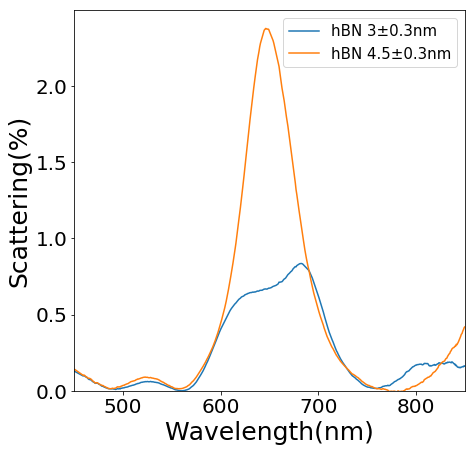

In [68]:
fig=plt.figure(1, figsize=(7,7))
dfthin_filt=np.delete(thinarr, 8, axis=0)
dfthick_filt=thickarr
av_thin = np.mean(dfthin_filt, axis=0)
av_thick = np.mean(dfthick_filt, axis=0)
std_thin = np.std(dfthin_filt, axis=0)
#for i in range(len(thinarr_test)):
    #plt.plot(wls_cr, thinarr_test[i])
plt.plot(wls_cr, av_thin-np.min(av_thin), label=u'hBN 3\u00b10.3nm')
plt.plot(wls_cr, av_thick, label=u'hBN 4.5\u00b10.3nm')
#plt.plot(wls_cr, avdf_around_filt*100, label='no hBN')
plt.xlim(450, 850)

plt.tick_params(axis='both', labelsize=20)
plt.xlabel("Wavelength(nm)", fontsize=25)
plt.ylabel("Scattering(%)", fontsize=25)
plt.ylim(0,)
plt.legend(fontsize=15)
fig.savefig("C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\Boron Nitride spacer\\Exfoliated hBN on Au\\2018-03-15 150218 exf_hBN 80nm NPs\\AvthinhBN_vs_offhBN.jpg", bbox_inches='tight')

In [45]:

wls_cr[np.argmax(av_thin-np.min(av_thin))]

682.4886830750766

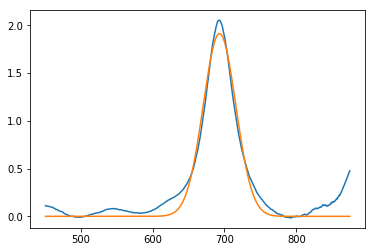

In [46]:
#Testing the fit on average spectrum

plt.plot(wls_cr,dfthin_filt[3])
multi_gauss_a = GaussianModel(prefix='g' + str(0) + '_')
multi_gauss_a.set_param_hint('g' + str(0) + '_center', value=700,
                                         min=600, max=800)
multi_gauss_a.set_param_hint('g' + str(0) + '_sigma', value=50)
multi_gauss_a.set_param_hint('g' + str(0) + '_amplitude', value=50.0 * np.sqrt(2 * np.pi) *np.max(dfthin_filt[3]))
multi_gauss_fit_a=multi_gauss_a.fit(dfthin_filt[3], x=wls_cr)
plt.plot(wls_cr, multi_gauss_fit_a.best_fit)

In [69]:
y_data = [multi_gauss_fit_a.best_fit]

In [70]:
q_factors_thin = datman.q_factor_calc(x_data=wls_cr, y_data=y_data)

In [72]:
q_factors_thin[0]

[13.082414642668793]

In [73]:
for i in range(len(dfthick_filt)):
    multi_gauss_fit_a=multi_gauss_a.fit(dfthin_filt[i], x=wls_cr)
    q_factor_thick = datman.q_factor_calc(x_data=wls_cr, y_data=[multi_gauss_fit_a.best_fit])

In [75]:
q_factor_thick[0]

[8.652247084229355]

In [76]:
tsthreshold_1 = datetime.datetime.strptime("2018-03-15T16:22:53.302000", "%Y-%m-%dT%H:%M:%S.%f")
tsthreshold_2 = datetime.datetime.strptime("2018-03-15T16:40:56.358000", "%Y-%m-%dT%H:%M:%S.%f")
around_flake2 = []
i=0
for i in range(0, len(dfmatwts)):
    if tsthreshold_1 < dfmatwts[i][-1] < tsthreshold_2:
        df_temp = dfmatwts[i][:-1]
        around_flake2.append(df_temp)
    else:
        pass
around_flake2 = np.array(around_flake2)

In [77]:
start_wl = 450
end_wl = 875

start_ind = np.where(wls.astype(int) == start_wl)
start_ind = start_ind[0][0]
end_ind = np.where(wls.astype(int) == end_wl)
end_ind = end_ind[0][0]
wls_cr = wls[start_ind:end_ind]

In [78]:
for i in range(len(around_flake2)):
    max_check = np.max(around_flake2[i][start_ind:end_ind])
    if max_check > 0.07:
        print "deleting " + str(i) 
        delnum = i
    else:
        pass

around_flake2 = np.delete(around_flake2, delnum, axis=0)

deleting 29


(470, 850)

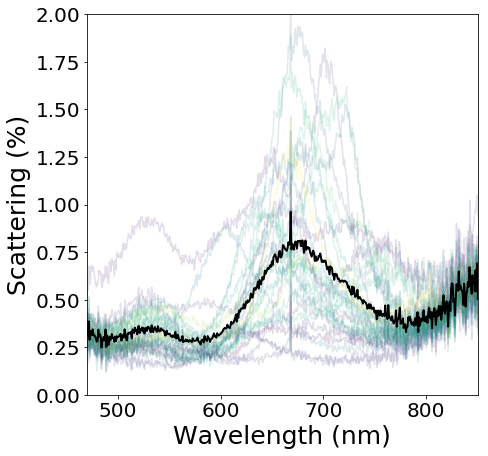

In [79]:
fig, ax, avdf_around_flake2 = alexplot.plot_all_df(spectra=around_flake2, wls=wls, colours=colours)
ax.set_ylim(0,2)
ax.set_xlim(470, 850)

In [80]:
wls_cr[np.argmax(avdf_around_filt[20:500])]

698.3621639493831

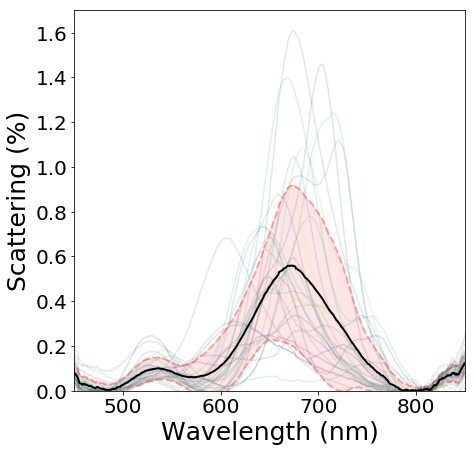

In [81]:
fig, ax, dfaround_filt, avdf_around_filt, wls_filt = alexplot.plot_all_smooth_df(spectra=around_flake2, wls=wls, colours=colours, baseline_subtract=2)
ax.set_xlim(450, 850)
ax.set_ylim(0,1.7)
fig.savefig("C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\Boron Nitride spacer\\Exfoliated hBN on Au\\2018-03-15 150218 exf_hBN 80nm NPs\\Allspectra_aroundflake2.jpg", bbox_inches='tight')

spectra same length


(450, 850)

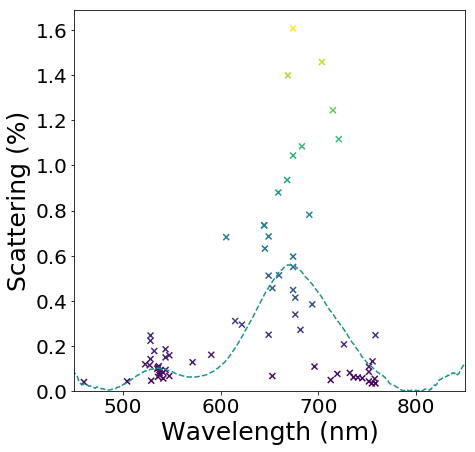

In [82]:
fig, ax, dfaround_pk_wls, dfaround_pk_intens, dfaround_pk_indexes, dfaround_pkwls_vec, dfaround_pkints_vec  = alexplot.plot_all_peaks(spectra_filt=dfaround_filt, wls_filt=wls_filt, colours=colours, threshold=0.1, cutoff=0.02)
ax.set_xlim(450,850)


In [86]:
fig, ax, dfhBN_pk_wls, dfhBN_pk_intens, dfhBN_pk_indexes, dfhBN_pkwls_vec, dfhBN_pkints_vec  = alexplot.plot_all_peaks(spectra_filt=dfthin_filt, wls_filt=wls_cr, colours=colours, threshold=0.1, cutoff=0.02)


spectra same length


IndexError: index 0 is out of bounds for axis 0 with size 0

(450, 850)

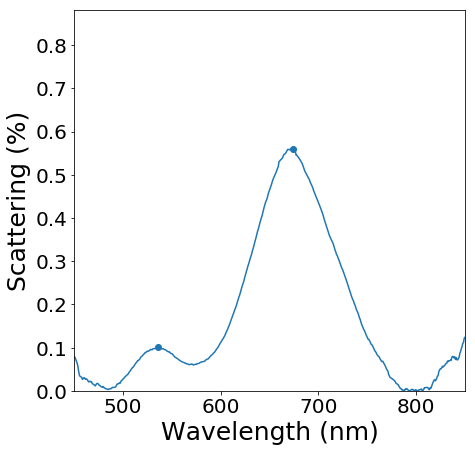

In [87]:
fig, ax = alexplot.fit_test(spectrum_filt=avdf_around_filt, wls_filt=wls_filt, threshold=0.1)
ax.set_xlim(450,850)

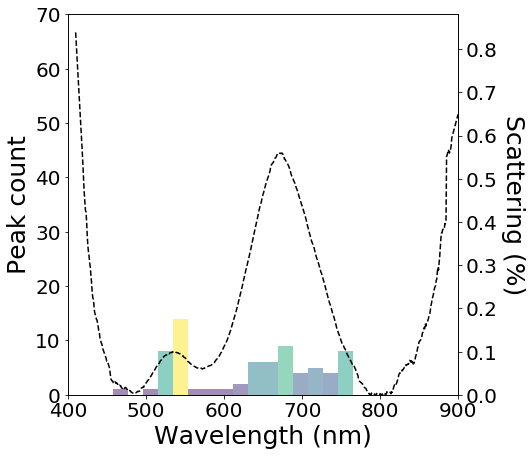

In [88]:
fig, ax = alexplot.peak_histogram(allpkwls=dfaround_pkwls_vec, wls=wls_filt, colours=colours, av_spectrum=avdf_around_filt, bins=25)

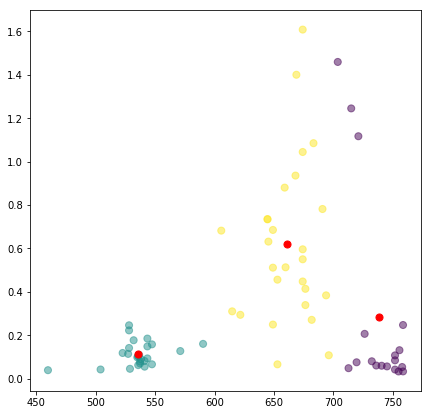

In [89]:
fig, ax, dframe, kmeans, centroids = alexplot.kmeans_pkplot(dfaround_pkwls_vec, dfaround_pkints_vec, n_clusters=3)

In [90]:
# Iterate through and create matrix containing gaussian fits for each spectrum
fit_mat_around = []
for i in range(0, len(dfaround_filt)):
    print "Fitting spectrum: " + str(i) + " of " + str(len(dfaround_filt))
    fit = datman.gaussian_fit_2(x_data=wls_filt[100:-90], y_data=dfaround_filt[i][100:-90], x_peak_indexes=dfaround_pk_wls[i], y_peak_values=dfaround_pk_intens[i])
    fit_mat_around.append(fit)

Fitting spectrum: 0 of 29
Fitting spectrum: 1 of 29
Fitting spectrum: 2 of 29
Fitting spectrum: 3 of 29
Fitting spectrum: 4 of 29
Fitting spectrum: 5 of 29
Fitting spectrum: 6 of 29
Fitting spectrum: 7 of 29
Fitting spectrum: 8 of 29
Fitting spectrum: 9 of 29
Fitting spectrum: 10 of 29
Fitting spectrum: 11 of 29
Fitting spectrum: 12 of 29
Fitting spectrum: 13 of 29
Fitting spectrum: 14 of 29
Fitting spectrum: 15 of 29
Fitting spectrum: 16 of 29
Fitting spectrum: 17 of 29
Fitting spectrum: 18 of 29
Fitting spectrum: 19 of 29
Fitting spectrum: 20 of 29
Fitting spectrum: 21 of 29
Fitting spectrum: 22 of 29
Fitting spectrum: 23 of 29
Fitting spectrum: 24 of 29
Fitting spectrum: 25 of 29
Fitting spectrum: 26 of 29
Fitting spectrum: 27 of 29
Fitting spectrum: 28 of 29


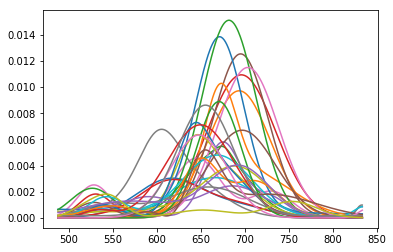

In [91]:
# Calculate Q factors for each mode and each spectrum
fit_plots_around = []
for i in range(0, len(fit_mat_around)):
    fit_plots_around.append(fit_mat_around[i].best_fit)
    plt.plot(wls_filt[100:-90],fit_mat_around[i].best_fit)
    
q_factors_around = datman.q_factor_calc(x_data=wls_filt, y_data=fit_plots_around)


(450, 850)

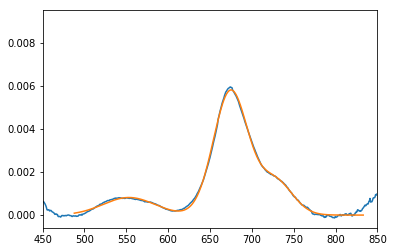

In [92]:
plt.plot(wls_filt, dfaround_filt[4])
plt.plot(wls_filt[100:-90], fit_plots_around[4])
plt.xlim(450,850)

In [94]:
np.max(q_factors_around[0])

11.937697309865529

ValueError: zero-size array to reduction operation maximum which has no identity

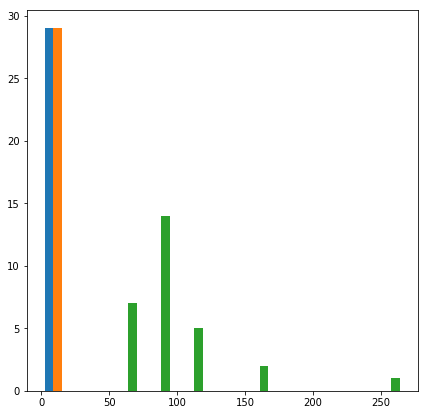

In [95]:
fig, ax, n_around, bins_around = alexplot.default_hist(q_factors_around, colours=colours, bins=11)
ax.set_xlabel("$Q$")
multi_gauss_a = GaussianModel(prefix='g' + str(0) + '_')
multi_gauss_fit_a = multi_gauss_a.fit(n_around, x=bins_around[1:])
qcentre = np.round(multi_gauss_fit_a.best_values.get('g0_center'),1)
qsigma = np.round(multi_gauss_fit_a.best_values.get('g0_sigma'),1)
qmax = np.round(np.max(q_factors_around))
ax.plot(bins_around[1:],multi_gauss_fit_a.best_fit, linestyle='--')
ax.text(2.5, 6,"$Q=$"+str(qcentre)+ u'\u00b1'+str(qsigma), fontsize=20)
ax.text(2.5, 5.5,"$Q_{max}=$"+str(qmax), fontsize=20)
multi_gauss_fit_a.best_values
fig.savefig("C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\Boron Nitride spacer\\Exfoliated hBN on Au\\2018-03-15 150218 exf_hBN 80nm NPs\\Qfactor_hist_aroundflake2.jpg", bbox_inches='tight')

In [96]:
# Iterate through and create matrix containing gaussian fits for each spectrum
fit_mat_thin = []
for i in range(0, len(dfthin_filt)):
    print "Fitting spectrum: " + str(i) + " of " + str(len(dfthin_filt))
    fit = datman.gaussian_fit_2(y_data=dfthin_filt[i], x_data=wls_cr )
    fit_mat_thin.append(fit)

Fitting spectrum: 0 of 9


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

In [867]:
y_peak_values = np.array([np.max(dfthin_filt[0])])

In [869]:
y_peak_values[0]

0.9860379630133059

In [860]:
len(wls_cr)

560